<a href="https://colab.research.google.com/github/rodraxphysics/Master_VIU_Data_Science/blob/main/07_Aprendizaje_Supervisado_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Predicción de la magnitud de la banda prohibida (bandgap) en compuestos inorgánicos mediante técnicas de Machine Learning** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Rodrigo Eduardo Sandoval Brito

**Director:** Jose Carlos González, PhD.



---


## <center> **Aplicacion de Aprendizaje Supervisado para Modelo de Clasificacion** <center>

**Importacion de dataset final descargado de API de Materials Project desde archivo csv**

In [ ]:
# Imports generales
import pandas as pd
import io
from google.colab import files
import numpy as np
import time

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)

  return df

In [ ]:
df = upload_files()
df.head()

Saving dataframe_TRATADO_completo.csv to dataframe_TRATADO_completo (3).csv
User uploaded file "dataframe_TRATADO_completo (3).csv" with length 22856101 bytes


,band_gap,nsites,nelements,volume,density,density_atomic,crystal_symmetry,symmetry_number,sides_abc,angles_abc,...,He_count,He_mass_ratio,Zr_count,Zr_mass_ratio,Np_count,Np_mass_ratio,Ta_count,Ta_mass_ratio,Pb_count,Pb_mass_ratio
0,1.6557,10,3,322.270798,3.584270,32.227080,7,2,6.806631,99.137022,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,7.5231,24,2,290.558390,2.879559,12.106600,5,63,6.882833,90.000000,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,5.6106,36,2,491.816081,2.434381,13.661558,2,96,7.525787,90.000000,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,4.7073,96,5,1498.617602,1.955611,15.610600,6,14,16.467193,84.262008,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,0.0230,72,4,1224.710534,4.626149,17.009869,6,14,6.699461,71.710630,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


**Transformamos variable numerica del bandgap a booleana para aplicar modelo de clasificacion**

In [ ]:
df['band_gap'] = df['band_gap'].apply(lambda x: 1 if x != 0 else 0)

**Normalizacion de las caracteristicas y division de datos training y test en ratio 80/20**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

selected_features = ['nsites', 'nelements', 'volume', 'density', 'density_atomic', 'crystal_symmetry', 'symmetry_number', 'sides_abc', 'angles_abc', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'efermi', 'is_magnetic', 'total_magnetization', 'num_magnetic_sites', 'molecular_weight', 'Ho_count', 'Ho_mass_ratio', 'Ti_count', 'Ti_mass_ratio', 'Lu_count', 'Lu_mass_ratio', 'Hf_count', 'Hf_mass_ratio', 'Cu_count', 'Cu_mass_ratio', 'Ga_count', 'Ga_mass_ratio', 'Ba_count', 'Ba_mass_ratio', 'Te_count', 'Te_mass_ratio', 'Au_count', 'Au_mass_ratio', 'Ce_count', 'Ce_mass_ratio', 'Pa_count', 'Pa_mass_ratio', 'Br_count', 'Br_mass_ratio', 'Gd_count', 'Gd_mass_ratio', 'Nb_count', 'Nb_mass_ratio', 'Dy_count', 'Dy_mass_ratio', 'Os_count', 'Os_mass_ratio', 'Nd_count', 'Nd_mass_ratio', 'Co_count', 'Co_mass_ratio', 'Zn_count', 'Zn_mass_ratio', 'Ni_count', 'Ni_mass_ratio', 'V_count', 'V_mass_ratio', 'Cd_count', 'Cd_mass_ratio', 'Hg_count', 'Hg_mass_ratio', 'La_count', 'La_mass_ratio', 'Cs_count', 'Cs_mass_ratio', 'B_count', 'B_mass_ratio', 'Ag_count', 'Ag_mass_ratio', 'Ru_count', 'Ru_mass_ratio', 'Ar_count', 'Ar_mass_ratio', 'Tb_count', 'Tb_mass_ratio', 'Y_count', 'Y_mass_ratio', 'Sn_count', 'Sn_mass_ratio', 'Fe_count', 'Fe_mass_ratio', 'Yb_count', 'Yb_mass_ratio', 'P_count', 'P_mass_ratio', 'Sb_count', 'Sb_mass_ratio', 'Er_count', 'Er_mass_ratio', 'Ir_count', 'Ir_mass_ratio', 'Th_count', 'Th_mass_ratio', 'Si_count', 'Si_mass_ratio', 'O_count', 'O_mass_ratio', 'F_count', 'F_mass_ratio', 'Na_count', 'Na_mass_ratio', 'Pr_count', 'Pr_mass_ratio', 'N_count', 'N_mass_ratio', 'Mo_count', 'Mo_mass_ratio', 'Se_count', 'Se_mass_ratio', 'Kr_count', 'Kr_mass_ratio', 'Tl_count', 'Tl_mass_ratio', 'Mg_count', 'Mg_mass_ratio', 'Rb_count', 'Rb_mass_ratio', 'Ne_count', 'Ne_mass_ratio', 'Li_count', 'Li_mass_ratio', 'W_count', 'W_mass_ratio', 'Eu_count', 'Eu_mass_ratio', 'Al_count', 'Al_mass_ratio', 'Pm_count', 'Pm_mass_ratio', 'Sr_count', 'Sr_mass_ratio', 'Rh_count', 'Rh_mass_ratio', 'As_count', 'As_mass_ratio', 'Pt_count', 'Pt_mass_ratio', 'Cr_count', 'Cr_mass_ratio', 'Pd_count', 'Pd_mass_ratio', 'Tc_count', 'Tc_mass_ratio', 'I_count', 'I_mass_ratio', 'Sm_count', 'Sm_mass_ratio', 'Re_count', 'Re_mass_ratio', 'Ge_count', 'Ge_mass_ratio', 'Cl_count', 'Cl_mass_ratio', 'S_count', 'S_mass_ratio', 'U_count', 'U_mass_ratio', 'H_count', 'H_mass_ratio', 'Tm_count', 'Tm_mass_ratio', 'In_count', 'In_mass_ratio', 'K_count', 'K_mass_ratio', 'Bi_count', 'Bi_mass_ratio', 'Mn_count', 'Mn_mass_ratio', 'Ca_count', 'Ca_mass_ratio', 'Sc_count', 'Sc_mass_ratio', 'Pu_count', 'Pu_mass_ratio', 'Ac_count', 'Ac_mass_ratio', 'Be_count', 'Be_mass_ratio', 'Xe_count', 'Xe_mass_ratio', 'C_count', 'C_mass_ratio', 'He_count', 'He_mass_ratio', 'Zr_count', 'Zr_mass_ratio', 'Np_count', 'Np_mass_ratio', 'Ta_count', 'Ta_mass_ratio', 'Pb_count', 'Pb_mass_ratio']

X=df[selected_features]
y=df["band_gap"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_test.shape)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(5845, 197)
(23377, 197)
(23377,)
(5845,)


**Aplicamos el algoritmo de Clasificacion RFC con hiperparametros ya optimizados**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Inicializar el clasificador de Random Forest
best_params={'n_estimators': 681, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 37, 'bootstrap': False}
rf = RandomForestClassifier(**best_params,random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular y mostrar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo en el conjunto de prueba:", accuracy)

# Mostrar la matriz de confusión
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))

# Mostrar el informe de clasificación
print("Informe de clasificación:\n", classification_report(y_test, y_pred))

Precisión del modelo en el conjunto de prueba: 0.9271171941830625
Matriz de confusión:
 [[3056  236]
 [ 190 2363]]
Informe de clasificación:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93      3292
           1       0.91      0.93      0.92      2553

    accuracy                           0.93      5845
   macro avg       0.93      0.93      0.93      5845
weighted avg       0.93      0.93      0.93      5845



**Generamos grafico de Matriz de Confusion**

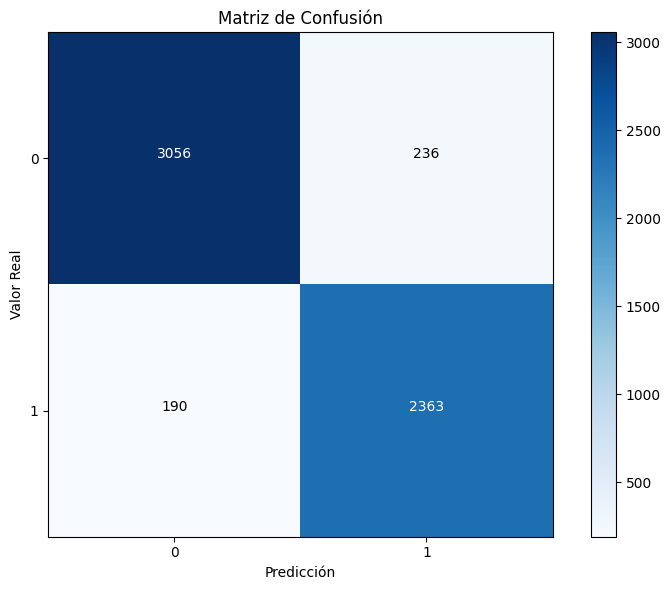

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Gráfica de la matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
classes = sorted(set(y_test))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')

# Agregar el número de instancias en cada casillero
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.savefig('matriz_confusion.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
pip install cairosvg

In [ ]:
import cairosvg
# Convert SVG to PDF with adjustable DPI
svg_file = 'matriz_confusion.svg'
pdf_file = 'matriz_confusion.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")



Archivo PDF 'matriz_confusion.pdf' creado con éxito.


**Generamos grafico de Curva ROC**

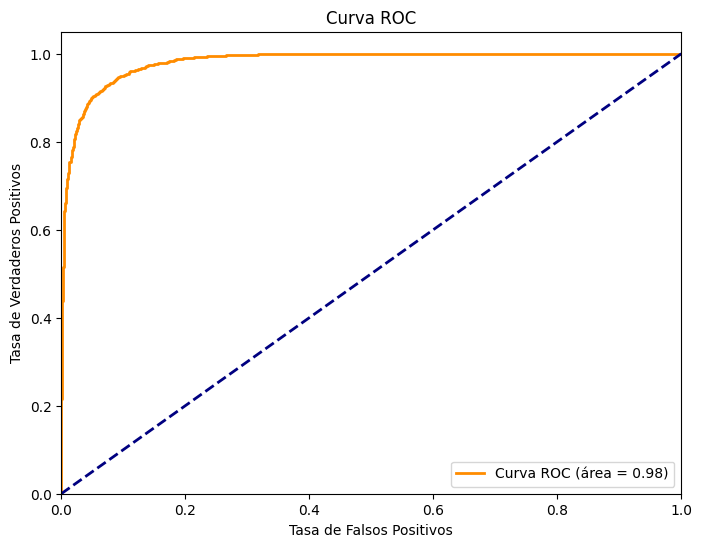

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Gráfica de la curva ROC
plt.figure(figsize=(8, 6))
y_score = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.savefig('curva_ROC.svg', format='svg', bbox_inches='tight')
plt.show()

In [ ]:
import cairosvg

# Convert SVG to PDF with adjustable DPI
svg_file = 'curva_ROC.svg'
pdf_file = 'curva_ROC.pdf'
dpi = 300  # Adjust DPI as needed

# Convert SVG to PDF with specified DPI
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file, dpi=dpi)

print(f"Archivo PDF '{pdf_file}' creado con éxito.")



Archivo PDF 'curva_ROC.pdf' creado con éxito.
